<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
filepath = "data/pgafulldata.csv"
data = pd.read_csv(filepath, encoding='latin1')
data.head()

,PLAYER NAME,Ball Speed,Driving Distance,Approaches from > 100 yards,Eagles (Holes per),Putts Per Round,Birdie Average,Proximity to Hole,FedexCup Regular Season Points,Average Distance of Putts made,...,Total Birdies,Total Eagles,Spin Rate,Top 10 Finishes,Sand Save Percentage,Scrambling,SG: Total,Smash Factor,Country,College
0,A.J. McInerney (2018),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,USA,"University of Nevada-Las Vegas 2016, Finance"
1,Aaron Wise (2017),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,USA,University of Oregon
2,Aaron Wise (2018),171.85,302.9,"33' 5""",264.0,29.15,4.11,"36' 8""",1086.0,"79' 2""",...,362.0,6.0,2580.3,4.0,47.92,56.28,0.703,1.502,USA,University of Oregon
3,Aaron Wise (2019),174.29,302.6,"33' 10""",414.0,29.25,4.42,"37' 5""",400.0,"72' 1""",...,305.0,3.0,2331.3,1.0,48.19,52.05,0.329,1.495,USA,University of Oregon
4,Abraham Ancer (2016),159.60,276.4,"32' 4""",864.0,29.06,3.33,"34' 9""",147.0,"65' 4""",...,160.0,1.0,2604.7,NaN,46.75,56.67,-0.727,1.493,MEX,"University of Oklahoma 2013, Multi-Disciplinar..."


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


## Dataset Summary
This dataset contains the statistics for the top 200 PGA Tour players from 2015-2019. The original dataset comprises of 29 columns with stats about every aspect of their game, including driving distance, putts per round, proximity to the hole, and many more.

## Objective of the Analysis
In this analysis of PGA Tour data, the model to be constructed will mostly focus on interpretation. While the model will try and predict Scoring Averages on the testing data, there is more interest on the coefficients that drive those predictions. This will tell us the aspects of the golf game that most directly lead to better scores.

## Data Cleaning and Feature Engineering
Below are listed all of the actions taken to clean the data and implement new features:
- Any row with a null value in the scoring average was removed since that is the target feature
- Any distance related metric that was measured in feet and inches was converted to a decimal in feet
- This dataset included a lot superfluous statistics that do not relate to performance, so any of those are removed

In [4]:
#Removing any rows without a scoring average (target value)
data.dropna(subset=['Scoring Average'], inplace=True)

#Seperating the name column into a name and year column
def obj_to_int(obj):
    if pd.isna(obj):
        return None
    
    return int(obj)

data['Player Name'] = data['PLAYER NAME'].str.extract(r'^(.*) \(\d{4}\)$')
data['Year'] = data['PLAYER NAME'].str.extract(r'\((\d{4})\)')
data['Year'] = data['Year'].apply(obj_to_int)

#Function to convert distance to a decimal
def feet_inches_string_to_decimal(ft_inches_str):
    if pd.isna(ft_inches_str) or ft_inches_str.strip == "":
        return None
    
    clean_str = ft_inches_str.replace("'", "")
    clean_str = clean_str.replace("\"", "")
    parts = clean_str.split(" ")
    if len(parts) != 2:
        return None
    
    height = 0
    height += int(parts[0]) + float(int(parts[1])/12)
    return height

#Convert all feet and inches columns to decimals using the function above
data['Decimal Approach from > 100 Yards (Feet)'] = data['Approaches from > 100 yards'].apply(feet_inches_string_to_decimal)
data['Average Distance Putts Made (Feet)'] = data['Average Distance of Putts made'].apply(feet_inches_string_to_decimal)
data['Decimal Proximity to Hole (Feet)'] = data['Proximity to Hole'].apply(feet_inches_string_to_decimal)
    

#Removing all unecessary columns
data.drop(columns=['Eagles (Holes per)', 'FedexCup Regular Season Points', 'Official Money',
                   'Total Birdies', 'Total Eagles', 'Top 10 Finishes', 'Country', 'College', 
                   'PLAYER NAME', 'Approaches from > 100 yards', 'Average Distance of Putts made',
                   'Proximity to Hole', 'Player Name', 'Year'], inplace=True)

#Finally, removing any rows with null values, as there are many rows that are have little to no data
data = data.dropna()

#Determining skew of the target value and seeing if it needs to be transformed
result_score = data['Scoring Average']
skew(result_score)

np.float64(0.2691209692229855)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 2 to 1494
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ball Speed                                852 non-null    float64
 1   Driving Distance                          852 non-null    float64
 2   Putts Per Round                           852 non-null    float64
 3   Birdie Average                            852 non-null    float64
 4   GIR Percentage from Fairway               852 non-null    float64
 5   Bogey Average                             852 non-null    float64
 6   Par 3 Scoring Average                     852 non-null    float64
 7   Club Head Speed                           852 non-null    float64
 8   Par 4 Scoring Average                     852 non-null    float64
 9   Par 5 Scoring Average                     852 non-null    float64
 10  Driving Accuracy Percentage               

Note: A skew value of 0.26 is small enough to model normal distribution, and thus no transformations will have to occur on the target variable for the models themselves

# 2. Linear Regression Models


### Model Construction:
In the models to be constructed, a variety of parameters will be changed:
1. The Polynomial Degree: A higher polynomial degree on the data will fit the data better, at the risk of overfitting.
2. The Regularization Technique: Lasso, Ridge, and ElasticNet will be used.
3. The Lambda (Alpha Value): Each regularization technique needs an alpha value to determine the amount of regularization applied, a value that is too high can sometimes result in an underfit model.
- Each of these models will be created with a Pipeline object, each with a Standard Scaler applied to them.

Note: For each model constructed below, each will be compared with Stratified K-Fold Cross Validation, so there will be no explicit split into a testing and training set

In [6]:
#Splitting x and y data
X = data.drop(columns=['Scoring Average'])
y = data['Scoring Average']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 2 to 1494
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ball Speed                                852 non-null    float64
 1   Driving Distance                          852 non-null    float64
 2   Putts Per Round                           852 non-null    float64
 3   Birdie Average                            852 non-null    float64
 4   GIR Percentage from Fairway               852 non-null    float64
 5   Bogey Average                             852 non-null    float64
 6   Par 3 Scoring Average                     852 non-null    float64
 7   Club Head Speed                           852 non-null    float64
 8   Par 4 Scoring Average                     852 non-null    float64
 9   Par 5 Scoring Average                     852 non-null    float64
 10  Driving Accuracy Percentage               

In [7]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress only ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Parameters to be varied in each model
poly_degrees = [x+2 for x in range(3)]
alpha_values = np.geomspace(1e-3, 1, 4)

#Model result lists
lasso_model_scores = pd.DataFrame(index=poly_degrees, columns=alpha_values)
ridge_model_scores = pd.DataFrame(index=poly_degrees, columns=alpha_values)
enet_model_scores = pd.DataFrame(index=poly_degrees, columns=alpha_values)

#Functions that will perform the training

#Lasso Function
def lasso_model_train(X_data, y_data):
    sk_folds = KFold(n_splits=4)
    for index1, degree in enumerate(poly_degrees):
        for index2, alpha in enumerate(alpha_values):
            model = Pipeline([('poly_feat', PolynomialFeatures(degree=degree)), ('ss', StandardScaler()), ('la', Lasso(alpha=alpha, max_iter=1000))])
            lasso_model_scores.iloc[index1, index2] = cross_val_score(model, X_data, y_data, cv=sk_folds).mean()

#Ridge Function
def ridge_model_train(X_data, y_data):
    sk_folds = KFold(n_splits=4)
    for index1, degree in enumerate(poly_degrees):
        for index2, alpha in enumerate(alpha_values):
            model = Pipeline([('poly_feat', PolynomialFeatures(degree=degree)), ('ss', StandardScaler()), ('ri', Ridge(alpha=alpha))])
            ridge_model_scores.iloc[index1, index2] = cross_val_score(model, X_data, y_data, cv=sk_folds).mean()
        
#Elastic Net Function
def enet_model_train(X_data, y_data):
    sk_folds = KFold(n_splits=4)
    for index1, degree in enumerate(poly_degrees):
        for index2, alpha in enumerate(alpha_values):
            model = Pipeline([('poly_feat', PolynomialFeatures(degree=degree)), ('ss', StandardScaler()), ('en', ElasticNet(alpha=alpha, l1_ratio=0.5))])
            enet_model_scores.iloc[index1, index2] = cross_val_score(model, X_data, y_data, cv=sk_folds).mean()

#Evaluate all models
lasso_model_train(X, y)
ridge_model_train(X,y)
enet_model_train(X, y)

In [8]:
#Lasso Scores
lasso_model_scores

,0.001,0.010,0.100,1.000
2,0.931681,0.930139,0.906314,-0.011319
3,0.929978,0.929504,0.907321,-0.011319
4,0.920564,0.928579,0.908191,-0.011319


In [9]:
#Ridge Scores
ridge_model_scores

,0.001,0.010,0.100,1.000
2,0.911089,0.919307,0.926452,0.930421
3,0.855926,0.89416,0.914987,0.924519
4,0.671298,0.793105,0.879027,0.910921


In [10]:
#Enet Scores
enet_model_scores

,0.001,0.010,0.100,1.000
2,0.931509,0.930671,0.924303,0.408736
3,0.92934,0.929727,0.924285,0.417356
4,0.922993,0.92897,0.924497,0.419258


### Preliminary Analysis
<p>From the resulting dataframes above, we can make the following preliminary assumptions:</p>
<ol>
    <li>Lasso and Enet Models with a high alpha struggled severely</li>
    <li>Lasso Models with a low degree and alpha value performed the best</li>
    <li>Ridge Models with a low degree and high alpha performed the best</li>
    <li>Enet Models with a low degree and mid alpah value performed best</li>
</ol>
<p>From these assumptions, we can narrow down our dataframes (as shown below)</p>

In [11]:
best_lasso = lasso_model_scores.iloc[:2, :2]
best_ridge = ridge_model_scores.iloc[:2, 2:]
best_enet = enet_model_scores.iloc[:2, 1:3]
print(f'Lasso Values: \n{best_lasso}\n')
print(f'Ridge Values: \n{best_ridge}\n')
print(f'Enet Values: \n{best_enet}\n')

Lasso Values: 
      0.001     0.010
2  0.931681  0.930139
3  0.929978  0.929504

Ridge Values: 
        0.1       1.0
2  0.926452  0.930421
3  0.914987  0.924519

Enet Values: 
       0.01      0.10
2  0.930671  0.924303
3  0.929727  0.924285



### Final Model
From the models shown above, I would recommend the Lasso model with a polynomial degree of 2 and an alpha value of 0.01. It was the best performing model available, and given its exceptional score, will give us valueable insights on which features in our dataset are most important by looking at its coefficient values.

# 4. Insights and key findings


Text(0, 0.5, 'Coefficient')

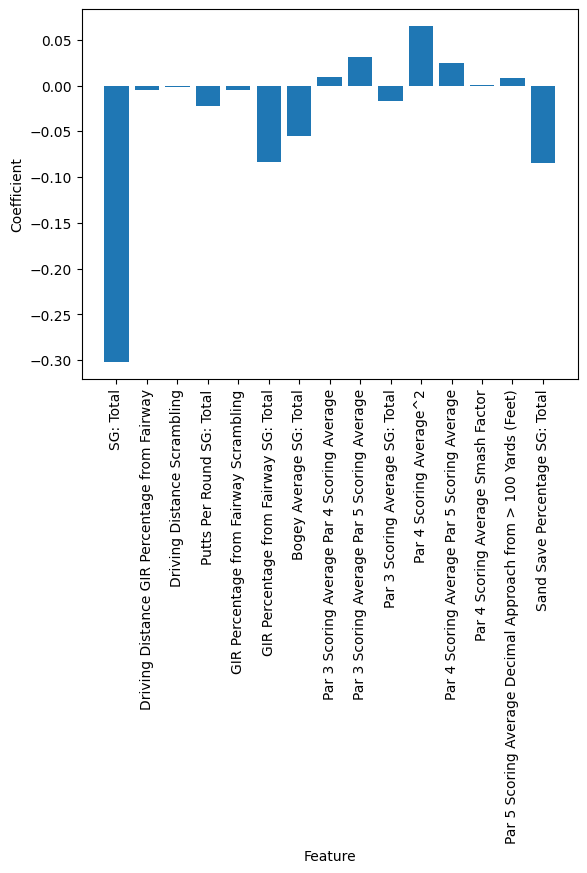

In [14]:
#Creation of the ideal model
pipe = Pipeline([('poly_feat', PolynomialFeatures(degree=2)), ('ss', StandardScaler()), ('la', Lasso(alpha=0.01))])
pipe = pipe.fit(X, y) #Fitted on the whole dataset with the assumption that we will collect differet data for testing

#Filtering out features that are zeroed out:
coefficients = pipe.named_steps['la'].coef_
non_zero_indicies = np.nonzero(coefficients)[0]
non_zero_features = pipe.named_steps['poly_feat'].get_feature_names_out()[non_zero_indicies]
non_zero_coefficients = coefficients[non_zero_indicies]

plt.bar(non_zero_features, non_zero_coefficients)
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient")

## Key Findings
<p>Of the 200+ coefficients that were used in the model, the Lasso regression zeroed out all but 14 of them, shown above in a bar graph. From this graph, we can list a couple of crucial findings:<p>
<ul>
    <li>Strokes gained is crucial, it is involved in almost every coefficient. This makes logical sense as if you gain strokes on the field, you will score better</li>
    <li>Short game is crucial. Putts per round and scrambling are prevalent in this graph.</li>
    <li>Hitting the green lowers scores. Another feature that was shown multiple times was some form of GIR statistic, whether it was GIR from the fairway or just in general, it had significance on the model.</li>
</ul>

# 5. Next Steps


As mentioned in the lessons, collinearity might be a concern in a dataset like this. So a next step that I would suggest is further exploring the features and determining if there is any to be resolved, enhancing our model even further. Additionally, I would try models on even more different values, perhaps even smaller alpha values or higher polynomial degrees with higher alphas. Other than that, I believe that the model constructed was fairly successful in its performance.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
